# Modeling

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family='Malgun Gothic')

### 모델(XGBClassifier)을 통해 나온 가중치로 재분류

##### modeling_06_09인 이유
##### 선형회귀(05)를 통해 가중치를 정해 모델링을 수행하려 했으나 결정계수가 좋지 않았음(0.18)
##### 따라서 모델링을 수행(06)한 뒤 feature_importance(06) 및 feature_correlation(07)을 통해
##### 신용등급을 재분류(08)한 뒤 최종 모델을 선정(09)

In [2]:
df = pd.read_csv('C:\\Users\\DMC CONET\\Documents\\python\\project1\\data\\종합데이터(수정).csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 4463
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준년월      4464 non-null   int64  
 1   대표자성별명    4464 non-null   object 
 2   대표자연령대명   4464 non-null   object 
 3   설립년도      4464 non-null   int64  
 4   사업지역명     4464 non-null   object 
 5   사업업종코드    4464 non-null   int64  
 6   사업업종명     4464 non-null   object 
 7   종업원수구분명   4464 non-null   object 
 8   재무기준년도    4464 non-null   int64  
 9   자본금액      4464 non-null   int64  
 10  매출금액      4464 non-null   int64  
 11  영업이익      4464 non-null   int64  
 12  당기순이익     4464 non-null   int64  
 13  자산총합계금액   4464 non-null   int64  
 14  부채총합계금액   4464 non-null   int64  
 15  보증잔액      4464 non-null   int64  
 16  운전자금대출여부  4464 non-null   object 
 17  시설자금대출여부  4464 non-null   object 
 18  예금평잔      4464 non-null   int64  
 19  대출평잔      4464 non-null   int64  
 20  신용평가등급명   4464 non-null   obje

In [4]:
df.columns

Index(['기준년월', '대표자성별명', '대표자연령대명', '설립년도', '사업지역명', '사업업종코드', '사업업종명',
       '종업원수구분명', '재무기준년도', '자본금액', '매출금액', '영업이익', '당기순이익', '자산총합계금액',
       '부채총합계금액', '보증잔액', '운전자금대출여부', '시설자금대출여부', '예금평잔', '대출평잔', '신용평가등급명',
       '신용점수', '신용등급'],
      dtype='object')

In [5]:
# 종업원수구분명(기업규모)는 범주형 변수지만 변수의 크기도 의미를 가지고 있음
# 따라서 LabelEncoding 수행

df['종업원수구분명'].replace({'0명' : 0, '1명 이상 5명 미만' : 1, '5명 이상 10명 미만' : 2, '10명 이상 30명 미만' : 3}, inplace = True)

In [6]:
num_list = ['매출금액', '영업이익', '자산총합계금액',
       '부채총합계금액', '예금평잔', '대출평잔']

In [7]:
X_numeric = df[num_list]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_numeric[num_list] = scaler.fit_transform(X_numeric[num_list])

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_24448\2246251495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numeric[num_list] = scaler.fit_transform(X_numeric[num_list])


In [9]:
X = pd.concat([X_numeric, df[['종업원수구분명']]], axis = 1)
y = df['신용등급']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
over_sampler = SMOTE()
X_over, Y_over = over_sampler.fit_resample(X_train, y_train)

# SVC

In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [16]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.93      0.93      0.93       167
           B       0.97      0.94      0.95       479
           C       0.95      0.96      0.95       763
           D       0.96      0.98      0.97      1105
           E       0.99      0.98      0.98      1057

    accuracy                           0.97      3571
   macro avg       0.96      0.96      0.96      3571
weighted avg       0.97      0.97      0.97      3571

              precision    recall  f1-score   support

           A       0.98      0.94      0.96        53
           B       0.96      0.97      0.97       119
           C       0.98      0.95      0.96       188
           D       0.96      0.99      0.97       271
           E       0.99      0.98      0.99       262

    accuracy                           0.97       893
   macro avg       0.97      0.97      0.97       893
weighted avg       0.97      0.97      0.97       893



## DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "min_samples_split" : range(5, 11)
}

grid_model = GridSearchCV(estimator = model_dt, param_grid = hyper_parameters, cv = 3, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_train, y_train)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(y_train, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

              precision    recall  f1-score   support

           A       0.84      0.68      0.75       167
           B       0.70      0.76      0.73       479
           C       0.74      0.55      0.64       763
           D       0.75      0.93      0.83      1105
           E       0.99      0.92      0.95      1057

    accuracy                           0.81      3571
   macro avg       0.81      0.77      0.78      3571
weighted avg       0.82      0.81      0.81      3571

              precision    recall  f1-score   support

           A       0.87      0.62      0.73        53
           B       0.64      0.84      0.72       119
           C       0.80      0.54      0.65       188
           D       0.78      0.93      0.85       271
           E       0.98      0.93      0.95       262

    accuracy                           0.82       893
   macro avg       0.81      0.77      0.78       893
weighted avg       0.83      0.82      0.81       893



C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


## DecisionTreeClassifier-SMOTE

In [21]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_over, Y_over)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "min_samples_split" : range(5, 11),
    "min_samples_leaf" : range(2, 7)
}

grid_model = GridSearchCV(estimator = model_dt, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over, Y_over)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_over, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

              precision    recall  f1-score   support

           A       0.92      0.97      0.95      1105
           B       0.82      0.80      0.81      1105
           C       0.67      0.82      0.74      1105
           D       0.81      0.67      0.73      1105
           E       0.99      0.92      0.95      1105

    accuracy                           0.84      5525
   macro avg       0.84      0.84      0.84      5525
weighted avg       0.84      0.84      0.84      5525

              precision    recall  f1-score   support

           A       0.79      1.00      0.88        53
           B       0.67      0.74      0.70       119
           C       0.64      0.78      0.71       188
           D       0.88      0.70      0.78       271
           E       0.98      0.94      0.96       262

    accuracy                           0.81       893
   macro avg       0.79      0.83      0.80       893
weighted avg       0.82      0.81      0.81       893



C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


## RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "min_samples_split" : range(5, 11)
}

grid_model = GridSearchCV(estimator = model_rf, param_grid = hyper_parameters, cv = 3, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_train, y_train)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(y_train, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           A       0.98      0.83      0.90       167
           B       0.84      0.91      0.88       479
           C       0.90      0.77      0.83       763
           D       0.85      0.94      0.89      1105
           E       0.97      0.95      0.96      1057

    accuracy                           0.90      3571
   macro avg       0.91      0.88      0.89      3571
weighted avg       0.90      0.90      0.90      3571

              precision    recall  f1-score   support

           A       0.98      0.87      0.92        53
           B       0.82      0.95      0.88       119
           C       0.93      0.73      0.82       188
           D       0.86      0.93      0.89       271
           E       0.94      0.97      0.95       262

    accuracy                           0.90       893
   macro avg       0.91      0.89      0.89       893
weighted avg       0.90      0.90      0.90       893



## RandomForestClassifier-SMOTE

In [24]:
model_rf = RandomForestClassifier()
model_rf.fit(X_over, Y_over)

hyper_parameters = {
    "max_depth" : range(5, 16),
    "min_samples_split" : range(5, 16),
    "min_samples_leaf" : range(2, 7)
}

grid_model = GridSearchCV(estimator = model_rf, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over, Y_over)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_over, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan 

              precision    recall  f1-score   support

           A       0.95      0.99      0.97      1105
           B       0.92      0.87      0.90      1105
           C       0.88      0.87      0.87      1105
           D       0.88      0.93      0.90      1105
           E       0.97      0.95      0.96      1105

    accuracy                           0.92      5525
   macro avg       0.92      0.92      0.92      5525
weighted avg       0.92      0.92      0.92      5525

              precision    recall  f1-score   support

           A       0.88      0.98      0.93        53
           B       0.82      0.90      0.86       119
           C       0.92      0.80      0.85       188
           D       0.90      0.92      0.91       271
           E       0.94      0.95      0.94       262

    accuracy                           0.90       893
   macro avg       0.89      0.91      0.90       893
weighted avg       0.90      0.90      0.90       893



## LightGBM

In [25]:
from lightgbm import LGBMClassifier

In [26]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "min_samples_split" : range(5, 11)
}

grid_model = GridSearchCV(estimator = model_lgbm, param_grid = hyper_parameters, cv = 3, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_train, y_train)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(y_train, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           A       1.00      1.00      1.00       167
           B       1.00      1.00      1.00       479
           C       1.00      1.00      1.00       763
           D       1.00      1.00      1.00      1105
           E       1.00      1.00      1.00      1057

    accuracy                           1.00      3571
   macro avg       1.00      1.00      1.00      3571
weighted avg       1.00      1.00      1.00      3571

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        53
           B       1.00      1.00      1.00       119
           C       1.00      0.99      1.00       188
           D       1.00      1.00      1.00       271
           E       1.00      1.00      1.00       262

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893



## LightGBM-SMOTE

In [27]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_over, Y_over)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "min_samples_split" : range(5, 11),
    "min_samples_leaf" : range(2, 7)
}

grid_model = GridSearchCV(estimator = model_lgbm, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over, Y_over)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_over, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1105
           B       1.00      1.00      1.00      1105
           C       1.00      1.00      1.00      1105
           D       1.00      1.00      1.00      1105
           E       1.00      1.00      1.00      1105

    accuracy                           1.00      5525
   macro avg       1.00      1.00      1.00      5525
weighted avg       1.00      1.00      1.00      5525

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        53
           B       1.00      1.00      1.00       119
           C       1.00      0.99      1.00       188
           D       1.00      1.00      1.00       271
           E       1.00      1.00      1.00       262

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893



## LightGBM-ADASYN

In [28]:
from imblearn.over_sampling import ADASYN

In [29]:
over_sampler2 = ADASYN()
X_over2, Y_over2 = over_sampler2.fit_resample(X_train, y_train)

In [31]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_over2, Y_over2)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "min_samples_split" : range(5, 11),
    "min_samples_leaf" : range(2, 7)
}

grid_model = GridSearchCV(estimator = model_lgbm, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over2, Y_over2)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over2)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_over2, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1104
           B       1.00      1.00      1.00      1100
           C       1.00      1.00      1.00      1114
           D       1.00      1.00      1.00      1105
           E       1.00      1.00      1.00      1110

    accuracy                           1.00      5533
   macro avg       1.00      1.00      1.00      5533
weighted avg       1.00      1.00      1.00      5533

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        53
           B       1.00      1.00      1.00       119
           C       1.00      0.99      1.00       188
           D       1.00      1.00      1.00       271
           E       1.00      1.00      1.00       262

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893



## XGBClassifier

In [32]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [33]:
y_train_label = y_train.replace({'E' : 0, 'D' : 1, 'C' : 2, 'B' : 3, 'A' : 4})
y_test_label = y_test.replace({'E' : 0, 'D' : 1, 'C' : 2, 'B' : 3, 'A' : 4})

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train_label)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "subsample" : [0.5, 1]
}

grid_model = GridSearchCV(estimator = model_xgb, param_grid = hyper_parameters, cv = 3, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_train, y_train_label)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(y_train_label, Y_train_pred))
print(classification_report(y_test_label, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00      1105
           2       1.00      1.00      1.00       763
           3       1.00      1.00      1.00       479
           4       1.00      1.00      1.00       167

    accuracy                           1.00      3571
   macro avg       1.00      1.00      1.00      3571
weighted avg       1.00      1.00      1.00      3571

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       271
           2       1.00      0.99      1.00       188
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00        53

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

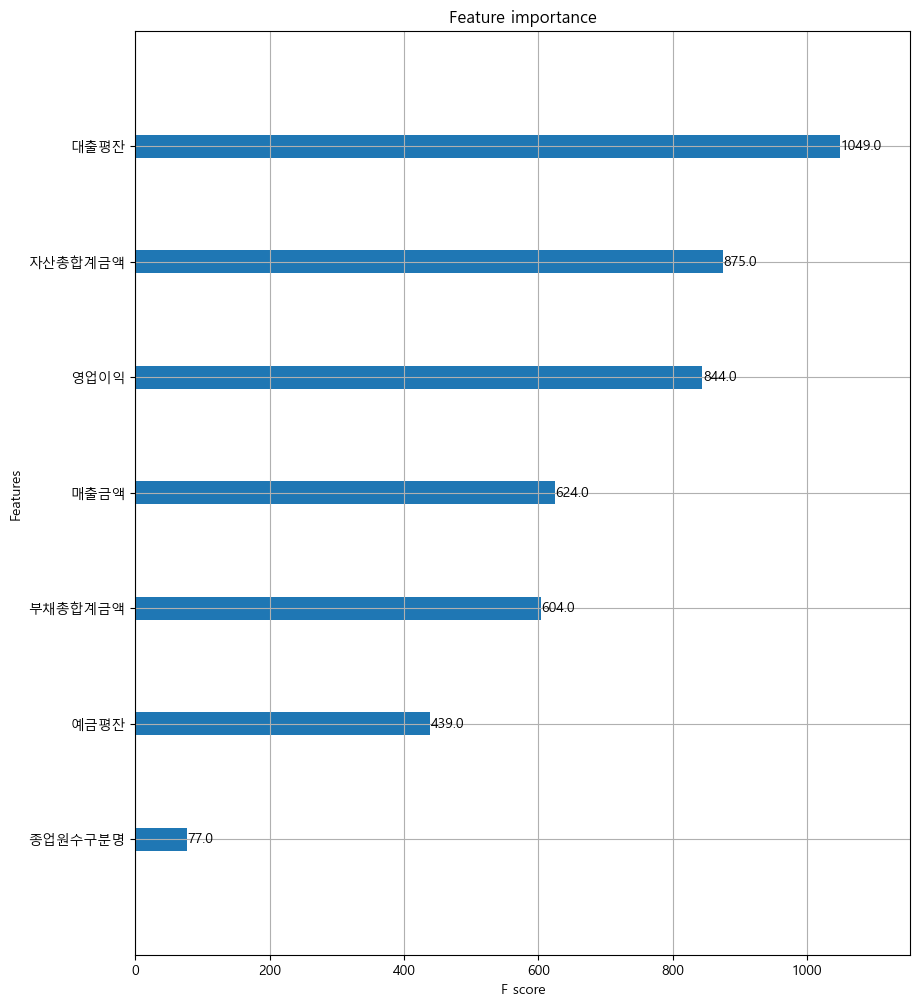

In [34]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

## XGBClassifier-SMOTE

In [35]:
Y_over_label = Y_over.replace({'E' : 0, 'D' : 1, 'C' : 2, 'B' : 3, 'A' : 4})

model_xgb = XGBClassifier()
model_xgb.fit(X_over, Y_over_label)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "subsample" : [0.5, 1],
    "learning_rate" : [0.1, 0.2, 0.3]
}

grid_model = GridSearchCV(estimator = model_xgb, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over, Y_over_label)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over)
Y_test_pred = best_model.predict(X_test)


print(classification_report(Y_over_label, Y_train_pred))
print(classification_report(y_test_label, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1105
           1       1.00      1.00      1.00      1105
           2       1.00      1.00      1.00      1105
           3       1.00      1.00      1.00      1105
           4       1.00      1.00      1.00      1105

    accuracy                           1.00      5525
   macro avg       1.00      1.00      1.00      5525
weighted avg       1.00      1.00      1.00      5525

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       262
           1       0.99      0.99      0.99       271
           2       1.00      0.99      1.00       188
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00        53

    accuracy                           0.99       893
   macro avg       1.00      1.00      1.00       893
weighted avg       0.99      0.99      0.99       893



## XGBClassifier-ADASYN

In [36]:
Y_over_label2 = Y_over2.replace({'E' : 0, 'D' : 1, 'C' : 2, 'B' : 3, 'A' : 4})

model_xgb = XGBClassifier()
model_xgb.fit(X_over2, Y_over_label2)

hyper_parameters = {
    "max_depth" : range(5, 11),
    "subsample" : [0.5, 1],
    "learning_rate" : [0.1, 0.2, 0.3]
}

grid_model = GridSearchCV(estimator = model_xgb, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over2, Y_over_label2)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over2)
Y_test_pred = best_model.predict(X_test)


print(classification_report(Y_over_label2, Y_train_pred))
print(classification_report(y_test_label, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1110
           1       1.00      1.00      1.00      1105
           2       1.00      1.00      1.00      1114
           3       1.00      1.00      1.00      1100
           4       1.00      1.00      1.00      1104

    accuracy                           1.00      5533
   macro avg       1.00      1.00      1.00      5533
weighted avg       1.00      1.00      1.00      5533

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       262
           1       1.00      0.99      0.99       271
           2       1.00      0.99      1.00       188
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00        53

    accuracy                           1.00       893
   macro avg       1.00      1.00      1.00       893
weighted avg       1.00      1.00      1.00       893



## LGBMClassifier-ADASYN-변수선택

In [37]:
num_list = ['자본금액', '매출금액', '영업이익', '자산총합계금액', 
            '보증잔액', '예금평잔', '대출평잔']
category_list = ['운전자금대출여부', '시설자금대출여부']

In [38]:
X_numeric = df[num_list]
X_cat = df[category_list]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_numeric[num_list] = scaler.fit_transform(X_numeric[num_list])

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_24448\2246251495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numeric[num_list] = scaler.fit_transform(X_numeric[num_list])


In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_cat_matrix = ohe.fit_transform(X_cat)
X_cat_ohe = pd.DataFrame(X_cat_matrix.toarray(), columns = ohe.get_feature_names())

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
X = pd.concat([X_numeric, X_cat_ohe], axis = 1)
X = pd.concat([X, df[['종업원수구분명']]], axis = 1)
y = df['신용등급']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234)

In [43]:
over_sampler = ADASYN()
X_over, Y_over = over_sampler.fit_resample(X_train, y_train)

In [44]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_over, Y_over)

hyper_parameters = {
    "max_depth" : range(5, 16),
    "num_leaves" : range(20, 31),
    "min_data_in_leaf" : range(10, 21)
}

grid_model = GridSearchCV(estimator = model_lgbm, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over, Y_over)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_over, Y_train_pred))
print(classification_report(y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1047
           B       1.00      1.00      1.00      1028
           C       1.00      1.00      1.00      1058
           D       1.00      1.00      1.00      1035
           E       1.00      1.00      1.00      1026

    accuracy                           1.00      5194
   macro avg       1.00      1.00      1.00      5194
weighted avg       1.00      1.00      1.00      5194

              precision    recall  f1-score   support

           A       0.98      1.00      0.99        65
           B       1.00      0.99      1.00       145
           C       1.00      1.00      1.00       236
           D       1.00      1.00      1.00       341
           E       1.00      1.00      1.00       329

    accuracy                           1.00      1116
   macro avg       1.00      1.00      1.00      1116
weighted avg       1.00      1.00      1.00      1116



## XGBClassifier-ADASYN-변수선택

In [45]:
Y_over_label = Y_over.replace({'E' : 0, 'D' : 1, 'C' : 2, 'B' : 3, 'A' : 4})

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_over, Y_over_label)

hyper_parameters = {
    "max_depth" : range(5, 16),
    "subsample" : [0.5, 1],
    "learning_rate" : [0.1, 0.2, 0.3],
    "gamma" : [0, 1, 3, 5]
}

grid_model = GridSearchCV(estimator = model_xgb, param_grid = hyper_parameters, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_over, Y_over_label)

best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_over)
Y_test_pred = best_model.predict(X_test)


print(classification_report(Y_over_label, Y_train_pred))
print(classification_report(y_test_label, Y_test_pred))